<a href="https://colab.research.google.com/github/siddharthbharthulwar/CV-COVID/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading and Extracting Images from Github

In [4]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset

unzip:  cannot find or open /content/covid-chestxray-dataset, /content/covid-chestxray-dataset.zip or /content/covid-chestxray-dataset.ZIP.


Patient Class for Cohesion Between Radiology Data and Patient Metadata


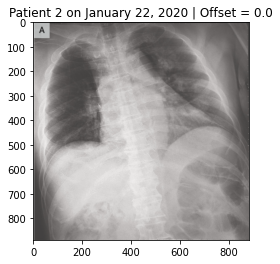

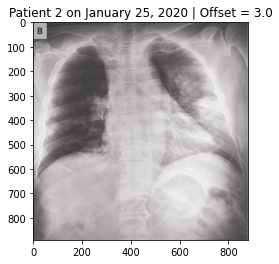

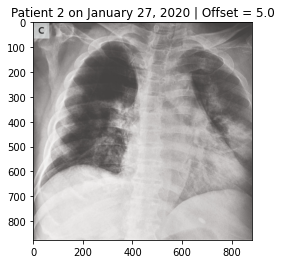

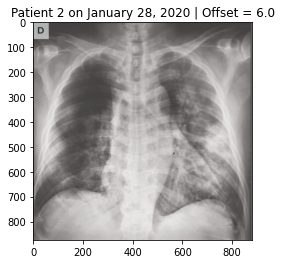

In [18]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

df = pd.read_csv('/content/covid-chestxray-dataset/metadata.csv')

class Patient:

    def __init__(self, patientID):
        
        self.patientID = patientID
        self.fileNames = []
        self.offsets = []
        self.dates = []
        self.images = []

        for index, row in df.iterrows(): #This isn't a very computationally efficient process but since the dataset is currently so small it shouldn't be a problem

            if row['patientid'] == self.patientID:

                self.fileNames.append(row['filename'])
                self.offsets.append(row['offset'])
                self.age = row['age']
                self.finding = row['finding']
                self.dates.append(row['date']) #assuming chronological order of entries per patient
                #not sure if the medical notes would be useful to store in each patient instance, so I won't include them for now

        for filename in self.fileNames:

            img = cv.imread('/content/covid-chestxray-dataset/images/' + filename)
            self.images.append(img)

    def show(self):

      for i in range(0, len(self.images)):

          plt.imshow(self.images[i])
          plt.title("Patient " + str(self.patientID) + " on " + self.dates[i] + " | Offset = " + str(self.offsets[i]))
          plt.show()

p = Patient(2)
p.show()